Neste notebook, testei dois modelos de classificação para prever a probabilidade de um cliente completar uma oferta:

Modelos Avaliados

Random Forest Classifier

XGBoost Classifier

```
Métricas e Resultados
Métrica	                        Random Forest	      XGBoost
AUC ROC (teste)   	             0.92	               0.85
AUC ROC (Val. Cruzada)	         0.7856	             0.8397
Des. Padrão (validação)	        0.0039	             0.0020
Acurácia (teste)	               0.85	               0.81
Recall (classe 1)                  0.91	               0.96
Precision (classe 1)           	0.86	               0.79

```



Importância das variáveis

Random Forest considerou múltiplas variáveis relevantes: age, credit_card_limit_norm, discount_value, duration.

XGBoost concentrou a maior parte da importância em discount_value, o que pode indicar sensibilidade excessiva a essa feature.

Interpretação:

A Random Forest apresentou melhor desempenho no teste, com bom equilíbrio entre precisão e recall.

O XGBoost foi mais estável em diferentes validações, mas com menor interpretabilidade e tendência a supervalorização de uma única variável.

Decisão Final:
Optei por manter o Random Forest como modelo principal, devido ao seu bom desempenho geral, equilíbrio entre métricas e melhor distribuição de importância entre variáveis.

O modelo XGBoost foi mantido como alternativa secundária e poderá ser utilizado em experimentos futuros ou em ensemble.



In [2]:
# Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')



# Leitura do dataset processado
df = pd.read_csv('/content/base_df.csv')

# Verificação inicial
print(df.shape)
df.head()


(101074, 20)


,offer_id,account_id,received_time,viewed_time,completed_time,reward,foi_visualizada,foi_completada,tempo_ate_visualizacao,tempo_ate_completamento,age,credit_card_limit,gender,registered_on,channels,discount_value,duration,min_value,offer_type,credit_card_limit_norm
0,f19421c1d4aa40978ebb69ca19b0e20d,0861b9ca31b741bb8b411b18f82d18f6,0.0,17.25,17.0,5.0,1,1,17.25,17.0,73,92000.0,M,20170627,"['web', 'email', 'mobile', 'social']",5,5.0,5,bogo,0.688889
1,f19421c1d4aa40978ebb69ca19b0e20d,0861b9ca31b741bb8b411b18f82d18f6,0.0,17.25,7.5,5.0,1,1,17.25,7.5,73,92000.0,M,20170627,"['web', 'email', 'mobile', 'social']",5,5.0,5,bogo,0.688889
2,f19421c1d4aa40978ebb69ca19b0e20d,0861b9ca31b741bb8b411b18f82d18f6,0.0,17.25,1.5,5.0,1,1,17.25,1.5,73,92000.0,M,20170627,"['web', 'email', 'mobile', 'social']",5,5.0,5,bogo,0.688889
3,f19421c1d4aa40978ebb69ca19b0e20d,0861b9ca31b741bb8b411b18f82d18f6,0.0,7.00,17.0,5.0,1,1,7.00,17.0,73,92000.0,M,20170627,"['web', 'email', 'mobile', 'social']",5,5.0,5,bogo,0.688889
4,f19421c1d4aa40978ebb69ca19b0e20d,0861b9ca31b741bb8b411b18f82d18f6,0.0,7.00,7.5,5.0,1,1,7.00,7.5,73,92000.0,M,20170627,"['web', 'email', 'mobile', 'social']",5,5.0,5,bogo,0.688889


In [3]:
# Variável alvo
target = 'foi_completada'

# Features
features =features = [
    'age',
    'credit_card_limit_norm',
    'discount_value',
    'duration',
    'min_value',
    'gender',
    'offer_type'
]

# Aplicando one-hot encoding nas variáveis categóricas
df_encoded = pd.get_dummies(df[features + [target]], columns=['gender', 'offer_type'], drop_first=True)

# X e y
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Dados finais
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()


X shape: (101074, 8)
y shape: (101074,)


,age,credit_card_limit_norm,discount_value,duration,min_value,gender_M,offer_type_discount,offer_type_informational
0,73,0.688889,5,5.0,5,True,False,False
1,73,0.688889,5,5.0,5,True,False,False
2,73,0.688889,5,5.0,5,True,False,False
3,73,0.688889,5,5.0,5,True,False,False
4,73,0.688889,5,5.0,5,True,False,False


In [4]:
# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificando as divisões
print("Treino:", X_train.shape, y_train.shape)
print("Teste :", X_test.shape, y_test.shape)


Treino: (70751, 8) (70751,)
Teste : (30323, 8) (30323,)


In [5]:
# Treinando o Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)


In [6]:
# Desempenho
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.83      0.75      0.79     11158
           1       0.86      0.91      0.89     19165

    accuracy                           0.85     30323
   macro avg       0.85      0.83      0.84     30323
weighted avg       0.85      0.85      0.85     30323


Matriz de Confusão:
[[ 8408  2750]
 [ 1726 17439]]


In [7]:
# Confiruação do segundo modelo, XGB
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Treinamento
xgb_model.fit(X_train, y_train)

# Previsões
y_pred_xgb = xgb_model.predict(X_test)


In [8]:
print("Relatório de Classificação - XGBoost:\n")
print(classification_report(y_test, y_pred_xgb))

print("\nMatriz de Confusão - XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))


Relatório de Classificação - XGBoost:

              precision    recall  f1-score   support

           0       0.89      0.56      0.68     11158
           1       0.79      0.96      0.86     19165

    accuracy                           0.81     30323
   macro avg       0.84      0.76      0.77     30323
weighted avg       0.82      0.81      0.80     30323


Matriz de Confusão - XGBoost:
[[ 6219  4939]
 [  806 18359]]


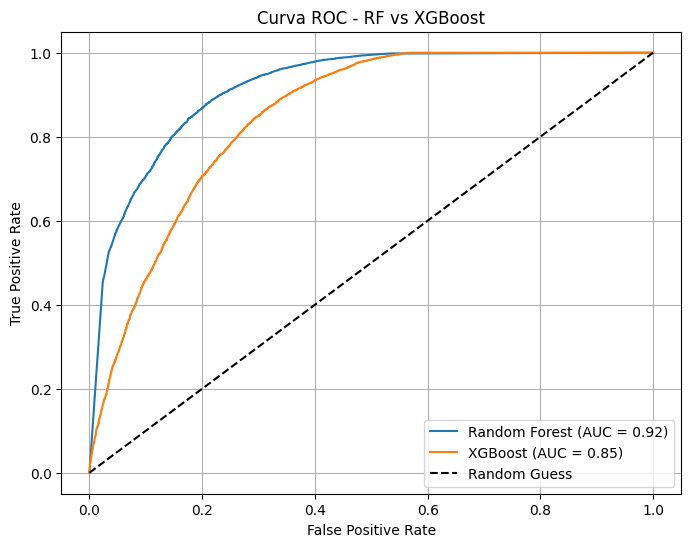

In [9]:
# Previsão de probabilidade para classe positiva
y_proba_rf = model.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Curva ROC - Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Curva ROC - XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - RF vs XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [10]:
# Random Forest
scores_rf = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print(f'Random Forest - AUC ROC médio: {scores_rf.mean():.4f} | Desvio padrão: {scores_rf.std():.4f}')

# XGBoost
scores_xgb = cross_val_score(xgb_model, X, y, cv=5, scoring='roc_auc')
print(f'XGBoost - AUC ROC médio: {scores_xgb.mean():.4f} | Desvio padrão: {scores_xgb.std():.4f}')


Random Forest - AUC ROC médio: 0.7856 | Desvio padrão: 0.0039
XGBoost - AUC ROC médio: 0.8397 | Desvio padrão: 0.0020


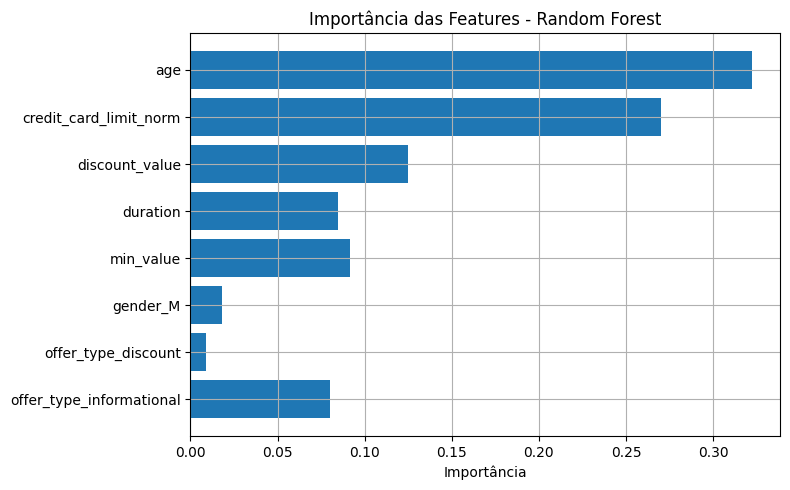

In [11]:
importances_rf = model.feature_importances_
features_rf = X.columns

# Plot
plt.figure(figsize=(8, 5))
plt.barh(features_rf, importances_rf)
plt.xlabel('Importância')
plt.title('Importância das Features - Random Forest')
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()
plt.show()


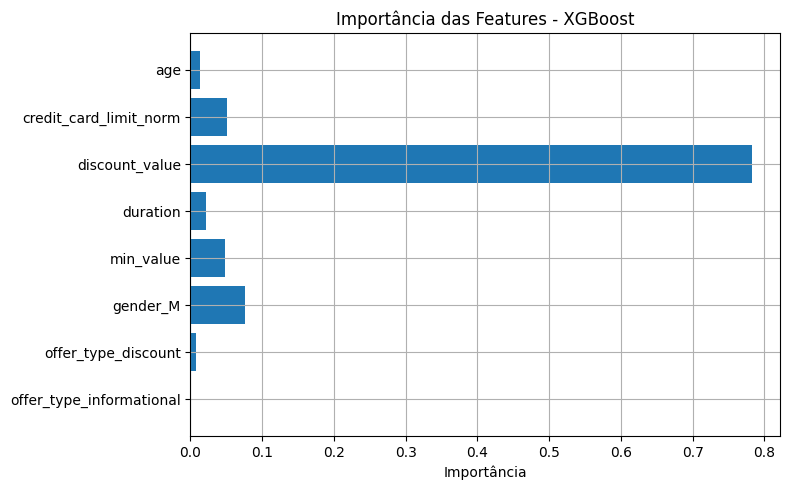

In [12]:
importances_xgb = xgb_model.feature_importances_
features_xgb = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features_xgb, importances_xgb)
plt.xlabel('Importância')
plt.title('Importância das Features - XGBoost')
plt.gca().invert_yaxis()
plt.grid()
plt.tight_layout()
plt.show()


In [13]:
# Salvando o modelo treinado para usar depois
joblib.dump(model, '/content/model_random_forest.pkl')


['/content/model_random_forest.pkl']

In [14]:
# Esse passo é apenas para carregar o modelo escolhido que já foi treinado e salvo.
modelo_carregado = joblib.load('/content/model_random_forest.pkl')

# Usar para prever
y_pred_novo = modelo_carregado.predict(X_test)
